K-means Project Tutorial

In this small project you will use the k-means algorithm to segment houses based on their coordinates and median income.
House clustering

We will create 6 housing clusters based only on their 'latitude','longitude' and their 'medincome' column.
https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv

Step 1:

Install and import the necessary libraries: pandas, sklearn and seaborn.

In [6]:
! pip install pandas
! pip install seaborn
! pip install matplotlib.
! pip install sklearn
! pip install plotly
! pip install folium


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
ERROR: Invalid requirement: 'matplotlib.'

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 6.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Step 2:

Load the housing dataset and take a look at the first rows. Then create a new dataframe with only the 'latitude','longitude' and 'medincome' column to create our clusters.

Step 3:

Instantiate the kmeans algorithm. Then, create a new 'cluster' feature in your dataset and predict the cluster by fitting the 3 columns you have. You can view the k-means documentation to implement it: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.

In [8]:
url='https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
df_raw=pd.read_csv(url)
df_raw

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
df=df_raw[['MedInc','Latitude','Longitude']]
df

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [10]:
df.describe()

,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


Step 4:

Convert your new 'cluster' column to 'category' type.

In [11]:
escalador=StandardScaler()
df_norm=escalador.fit_transform(df)
df_norm

array([[ 2.34476576,  1.05254828, -1.32783522],
       [ 2.33223796,  1.04318455, -1.32284391],
       [ 1.7826994 ,  1.03850269, -1.33282653],
       ...,
       [-1.14259331,  1.77823747, -0.8237132 ],
       [-1.05458292,  1.77823747, -0.87362627],
       [-0.78012947,  1.75014627, -0.83369581]])

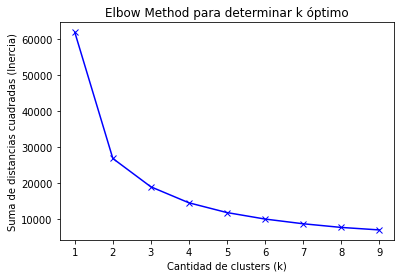

In [12]:
#cluster con mas cohesion -->metodo del codo y coef de silueta
#METODO DEL CODO
sum_distancias_cuadradas = []
#inercia calcula las distancias cuadradas

K = range(1,10)

for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    sum_distancias_cuadradas.append(kmeans.inertia_)
plt.plot(K,sum_distancias_cuadradas,'bx-')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Suma de distancias cuadradas (Inercia)')
plt.title('Elbow Method para determinar k óptimo')
plt.show()



Determina la cantidad de cluster optimo en este caso es de 2 por eso el k=2

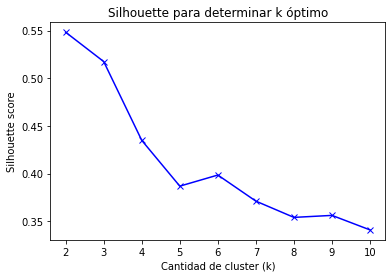

In [13]:


rango_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in rango_n_clusters:
# fit Kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    cluster_labels = kmeans.labels_
# calcular silhouette
    silhouette_avg.append(silhouette_score(df_norm, cluster_labels))
plt.plot(rango_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Cantidad de cluster (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette para determinar k óptimo')
plt.show()

#nos quedamos con k=2 porque es es el score de silueta dio mas alto.

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_norm)

KMeans(n_clusters=2)

In [18]:
df2=escalador.inverse_transform(df_norm)

In [23]:
df2=pd.DataFrame(df2,columns=['MedInc','Latitude','Longitude','Cluster'])

In [24]:
df2['Cluster'] = kmeans.labels_
df2

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,0
1,8.3014,37.86,-122.22,0
2,7.2574,37.85,-122.24,0
3,5.6431,37.85,-122.25,0
4,3.8462,37.85,-122.25,0
...,...,...,...,...
20635,1.5603,39.48,-121.09,0
20636,2.5568,39.49,-121.21,0
20637,1.7000,39.43,-121.22,0
20638,1.8672,39.43,-121.32,0


Step 5:

Use seaborn's relplot to visualize your new clusters.

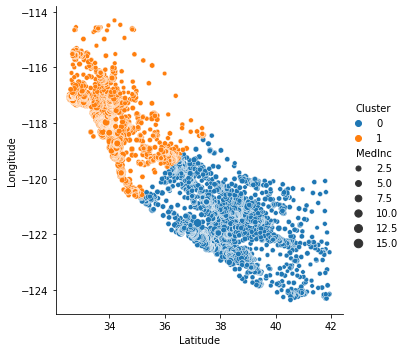

In [26]:
sns.relplot(x='Latitude', y='Longitude', data=df2, kind='scatter', size = 'MedInc',hue='Cluster')
plt.show()


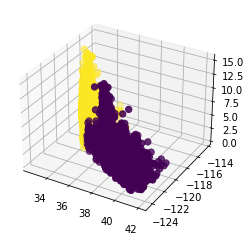

In [27]:
######## grafico 3D ##########

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df2['Latitude'])
y = np.array(df2['Longitude'])
z = np.array(df2['MedInc'])

ax.scatter(x,y,z, c=df2["Cluster"], s=40)

plt.show()

In [ ]:
# Otra forma

In [28]:
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [29]:
from sklearn.cluster import KMeans

In [30]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,5


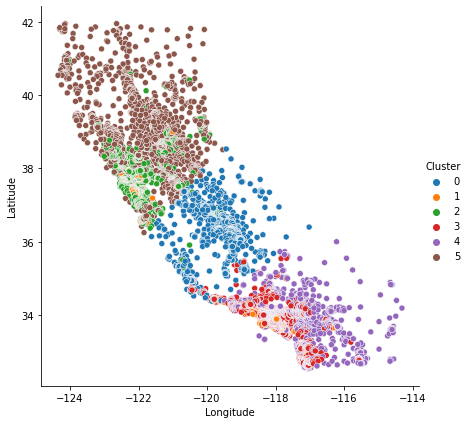

In [31]:
import seaborn as sns

sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

Step 6:

As always, use your notebook to experiment and make sure you are getting the results you want.

Use you app.py file to save your defined steps, pipelines or functions in the right order.

